https://www.youtube.com/watch?v=IQfG0faDrzE

#RDD's
They are the way Spark

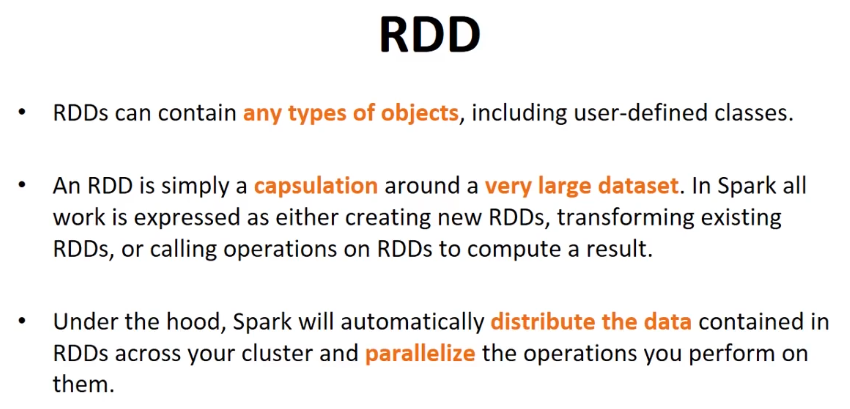

##Transformations, you use them to modify Rdd's

the transformation in the image filters only lines that have "friday"

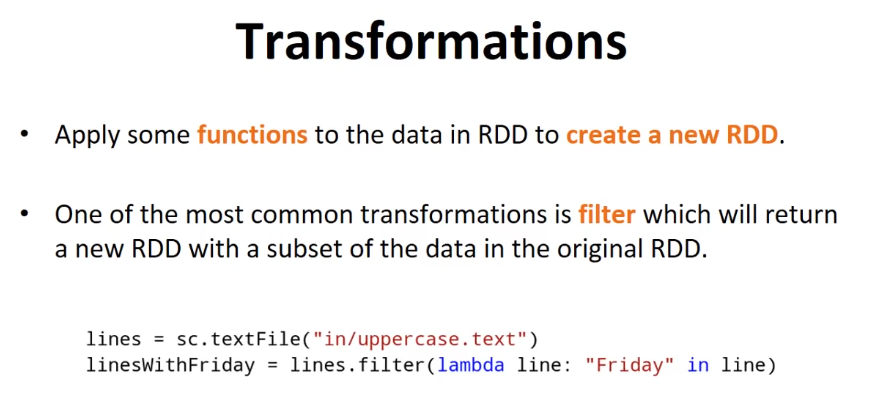

#Actions



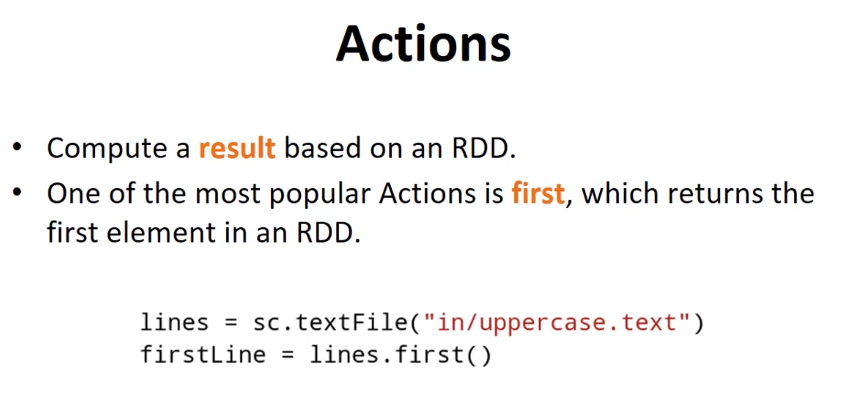

##Workflow:

Every spark program will work as follows:

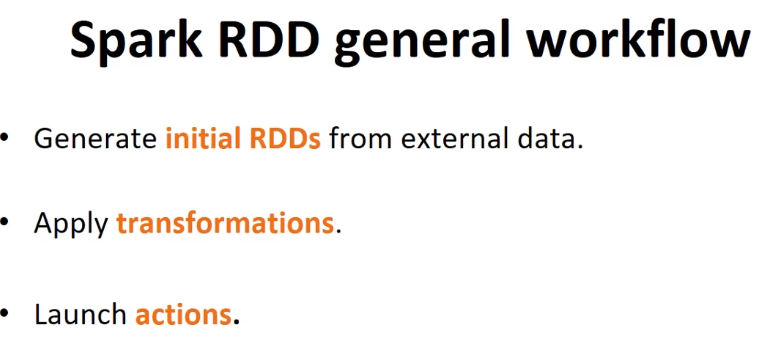

#Creating RDD's

* The simplest way to create RDD's is to take an existing collection and pass it to SparkContext.

  A SparkContext represents a connection to a computing cluster.

  Once you have a spark context you can use it to create RDD's

  The issue with this method is that it does not work with large datasets.

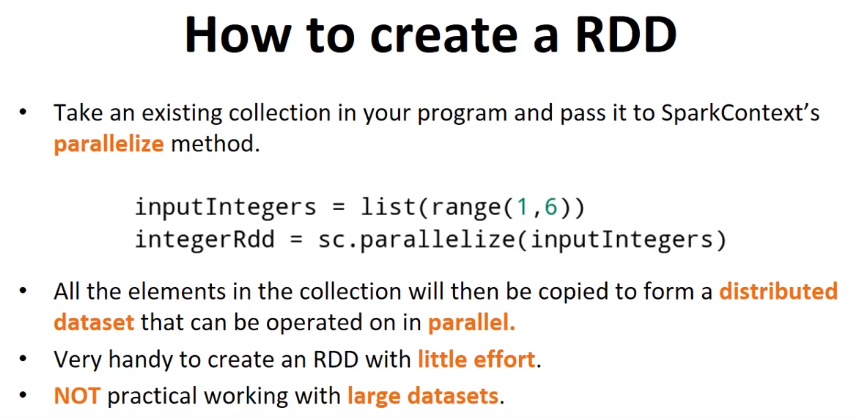

## Another method to create RDD's is to load them form exernal storage

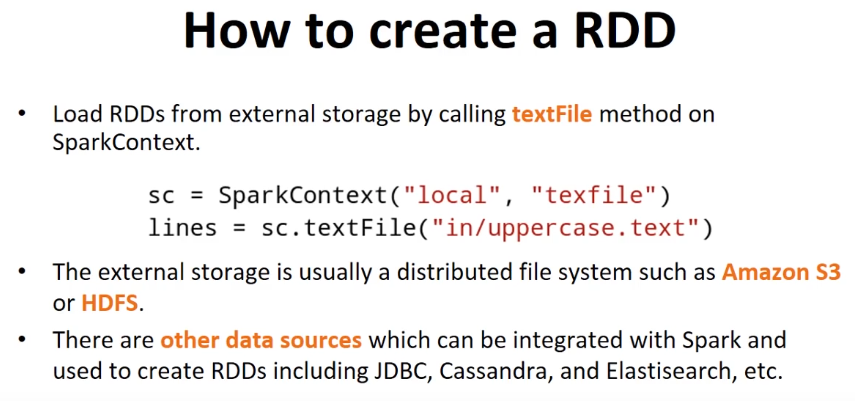

##RDD Transormations

Transformations are basically operations on RDD's thet return new RDD's.

Note: they return the transformation instead of mutating the RDD.


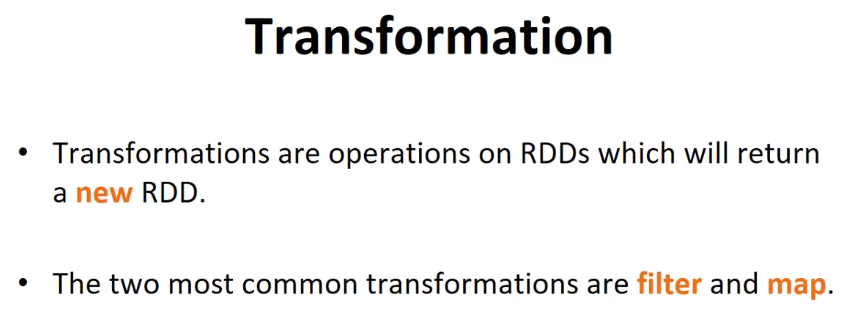

###Filter()

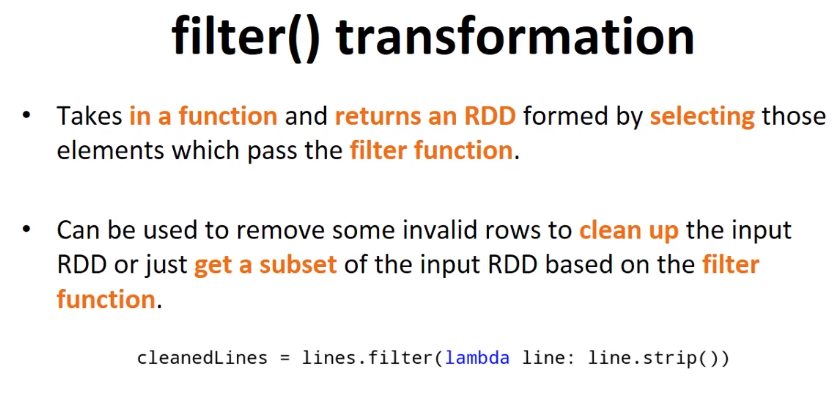

###Map

The first function basically takes the Urls and uses the function makeHttpRequest with the URLs as input.

The second one just returns an RDD of the square of the numbers on the RDD.



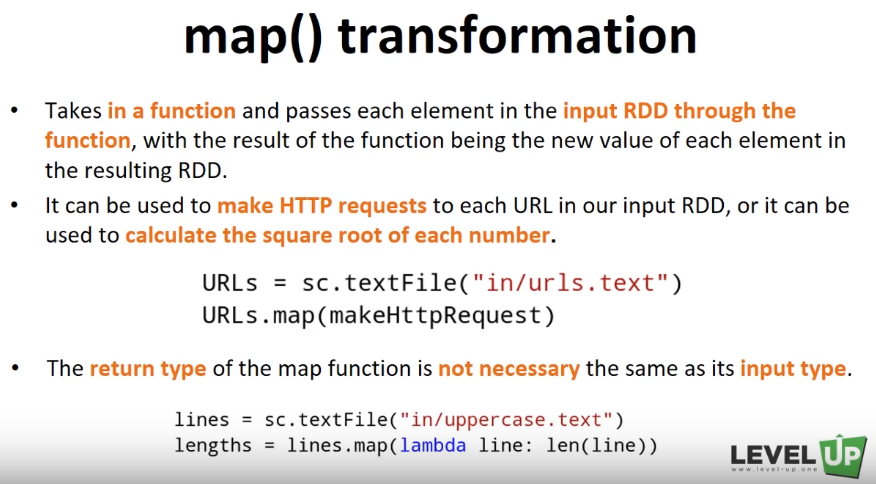

Note: some examples are built, but have to be run in pc, here is the git:
https://github.com/jleetutorial/python-spark-tutorial

Here we use the airports.text
We want to create a spark program that reads the airport data and find all the airports in the US and output the airports name and city.

1. 

In [0]:
import sys
sys.path.insert(0, '.')
from pyspark import SparkContext, SparkConf
#This next import is a file we made ourselves.
from commons.Utils import Utils #This is a collection of characters used as delimeters

def splitComma(line: str):
    splits = Utils.COMMA_DELIMITER.split(line)
    return "{}, {}".format(splits[1], splits[2])

if __name__ == "__main__":
    #The conf object specifies parameters for the spark aplication
    #here we set the name of the application and the masterURL of the spark cluster
      #the local means use only one core local[*] would use all
    conf = SparkConf().setAppName("airports").setMaster("local")#

    #Create spark context object, it represent the connection to a spark cluster
    #The context can be used to create RDD's, accumulators and broadcast variables across the cluster.
    sc = SparkContext(conf = conf)

    #This loads our inputfile as a string.
    airports = sc.textFile("in/airports.text")
    #Filter all the airports in the US
      #We do this by ussing a comma delimiter
    airportsInUSA = airports.filter(lambda line : Utils.COMMA_DELIMITER.split(line)[3] == "\"United States\"")

    #map the filter with the function splitComma
    airportsNameAndCityNames = airportsInUSA.map(splitComma)
    #Output the resulting RDD
    airportsNameAndCityNames.saveAsTextFile("out/airports_in_usa.text")


The previous application creates an out folder and creates two files, they are the expected airport name and city name pair

2. We try to find out all the airports with latitudes larger than 40

In [0]:
import sys
sys.path.insert(0, '.')
from pyspark import SparkContext, SparkConf
#This next import is a file we made ourselves.
from commons.Utils import Utils #This is a collection of characters used as delimeters

def splitComma(line: str):
    splits = Utils.COMMA_DELIMITER.split(line)
    return "{}, {}".format(splits[1], splits[2])

if __name__ == "__main__":
    #The conf object specifies parameters for the spark aplication
    #here we set the name of the application and the masterURL of the spark cluster
      #the local means use only one core local[*] would use all
    conf = SparkConf().setAppName("airports").setMaster("local")#

    #Create spark context object, it represent the connection to a spark cluster
    #The context can be used to create RDD's, accumulators and broadcast variables across the cluster.
    sc = SparkContext(conf = conf)

    #This loads our inputfile as a string.
    airports = sc.textFile("in/airports.text")
    #Filter all the airports in the by latitude
      #We do this by ussing a comma delimiter
    airportsInUSA = airports.filter(lambda line : Utils.COMMA_DELIMITER.split(line)[6] >40)

    #map the filter with the function splitComma
    airportsNameAndCityNames = airportsInUSA.map(splitComma)
    #Output the resulting RDD
    airportsNameAndCityNames.saveAsTextFile("out/airports_by_latitude.text")


## flatMap Transformation

The function passed to flatmap is applied to each element in the input RDD, but on flatmap, the results are flattened before being returned.


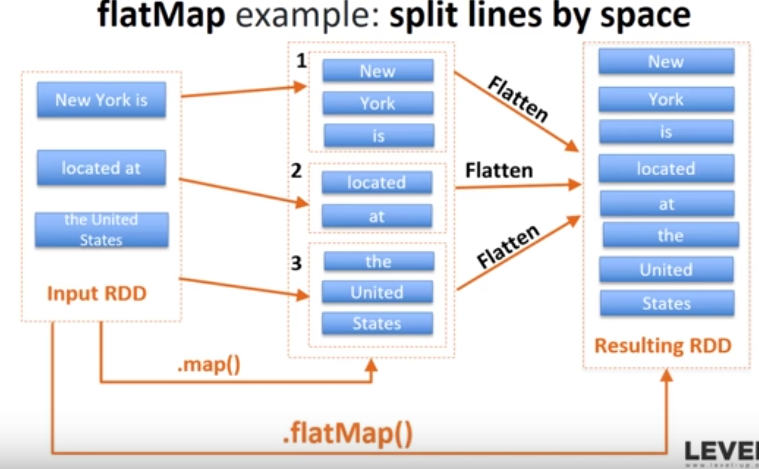

Use Map or FlatMap

* Map should be used when the rows of the input data and the rows of the output data have a 1-to-1 relationship.

* FlatMap should be used when you have 1 to many relationship between the rows of input data to rows of output data

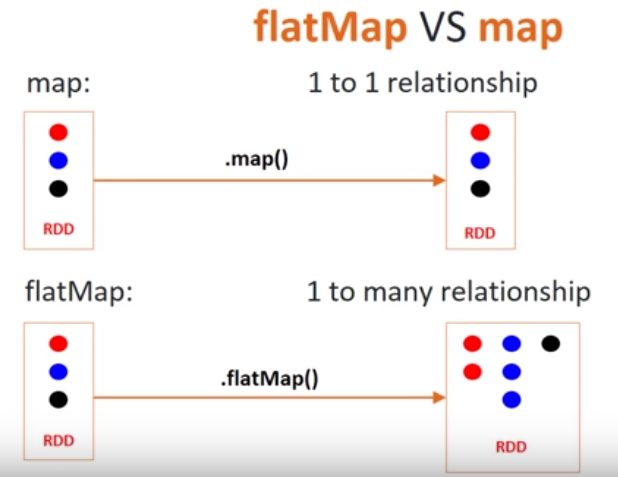

An example of flatMap

In [0]:
from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    conf = SparkConf().setAppName("word count").setMaster("local[3]")
    sc = SparkContext(conf = conf)
    
    lines = sc.textFile("in/word_count.text")
    #Here we create a FlatMap.
    words = lines.flatMap(lambda line: line.split(" "))
    
    wordCounts = words.countByValue()
    
    for word, count in wordCounts.items():
        print("{} : {}".format(word, count))



##Set operations

Set operations are another type of spark transformations performed on one RDD

The most popular ones are:

* Sample operations

* Distinct operations

####Sample operation:

It will create a random sample from the RDD, and its generally used for testing purposes.

You can use sampling with replacement and without replacement. You can also specify the fraction of the dataset you want to sample

def sample(self,withReplacement,fraction,seed)


####Distinct operation:

This operation returns the unique (distinct) rows from the input RDD.

NOTE: This operation is computationally expensive because it shuffles all the data across partitions to ensure we only have one value.

#Set operations on two RDDs
There are operations that are performed on two RDD's and return one RDD:

- Union: gives back an RDD consisting of the input data of both RDD's
- Intersection: Returns the common elements which appear in both RDD's (This operation is expensive)
- Substract: Returns (unique) elements present only in one RDD -whats only in one circle exclusively in a Venn Diagram(Expensive)
- Cartesian Product: returns all possible pairs of A and B, (It is a matrix multiplication)
 * This can be handy to compare the similarity of possible pairs.

Example.

NOTE: FUN FACT: If you tell Spark to work on 2 cores, it outputs two files part - 0000 and part - 0001, if you tell it on 3 it outputs 3, it is basically the work every core did.

In [0]:
from pyspark import SparkContext, SparkConf

def isNotHeader(line: str):
    #Return everything other than the line that starts with host and the bytes part
    return not (line.startswith("host") and "bytes" in line)

if __name__ == "__main__":
    #Create a SparkConfObject
    conf = SparkConf().setAppName("unionLogs").setMaster("local[*]")
    #Create a context
    sc = SparkContext(conf = conf)

    #upload the data (TSV = Tab separated variables)
    julyFirstLogs = sc.textFile("in/nasa_19950701.tsv")
    augustFirstLogs = sc.textFile("in/nasa_19950801.tsv")

    #Get an RDD of the union of both logs
    aggregatedLogLines = julyFirstLogs.union(augustFirstLogs)
    #We filter with the function is not Header
    cleanLogLines = aggregatedLogLines.filter(isNotHeader)
    #Take a sample of .1 fraction with replacement
    sample = cleanLogLines.sample(withReplacement = True, fraction = 0.1)
    #save
    sample.saveAsTextFile("out/sample_nasa_logs.csv")



Another program:
instructions:

Create a Spark program to generate a new RDD which contains the hosts which are accessed on BOTH days.
Save the resulting RDD to "out/nasa_logs_same_hosts.csv" file.


In [0]:

from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    #Create a SparkConfObject
    conf = SparkConf().setAppName("unionLogs").setMaster("local[*]")
    #Create a context
    sc = SparkContext(conf = conf)

    #upload the data (TSV = Tab separated variables)
    julyFirstLogs = sc.textFile("in/nasa_19950701.tsv")
    augustFirstLogs = sc.textFile("in/nasa_19950801.tsv")
    
    #This splits the lines   
    julyFirstHosts = julyFirstLogs.map(lambda line: line.split("\t")[0])
    augustFirstHosts = augustFirstLogs.map(lambda line: line.split("\t")[0])

    #Get an RDD of the intersection of both logs
    intersection = julyFirstHosts.intersection(augustFirstHosts)
    
    #We get everything that is not the host
    cleanedHostIntersection = intersection.filter(lambda host: host != "host")
    #output the file
    cleanedHostIntersection.saveAsTextFile("out/nasa_logs_same_hosts.csv")



#Actions

Actions are the second type of RDD operation.

Actions return a final value to the driver program or persist data to an external storage system.

Popular actions in spark:

* collect: Retrieves the entire RDD and retruns it to the driver program in the form of a regular collection or value.
  * For example, if you have a string (or any other type) RDD, when you call collect on it, you get a list of strings. Once you get the value returned you can manipulate the results and pass it to the driver machine or persist it to disk.
  * This is helpfull when your program has filtered RDD's down to a relatively small size and you want to deal with it locally. - NOTE: The entire data set must fit into your machine.
  * This operation is used in unit tests, to compare the value of the RDD with our expected result.



* count: This counts how many rows are there in an RDD.
 * You can use countByValue to look at unique values and return a map of each unique value to its count. - this is useful when your RDD contains duplicate rows and you want to count how many of each unique row value you have.

* take: takes n elements from an RDD.
  * This is useful to take a peek at the RDD for unit tests and quick debugging.
  * NOTE: take will try to reduce the number of partitions it accesses, so is possible to get back a biased collection and it does not necessary return the elements in the order we might expect.

* saveAsTextFile: used to write data into a distributed storage system or even local file system.

* reduce: Probably the mose common action, it takes a function that operates on two elements of the type in the input RDD and returns a new element of the same type. It reduces the elements of the RDD using the specified binary function.
  * This function produces the same result when repetitively applied on the same set of RDD data, and reduces to a single value.
  * With this operation we can perform different types of aggregations (sum all the elements, count total number of elements, etc...)


###Collect example

In [0]:
from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    conf = SparkConf().setAppName("collect").setMaster("local[*]")
    sc = SparkContext(conf = conf)
    
    #input words
    inputWords = ["spark", "hadoop", "spark", "hive", "pig", "cassandra", "hadoop"]
    
    #the parallelize method converts the words into RDD
    wordRdd = sc.parallelize(inputWords)
    
    #Convert the IDD back to the list of strings
    words = wordRdd.collect()
    
    #print them
    for word in words:
        print(word)



####Count example

returns a count of words (duplicates count double in counts)

In [0]:
from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    conf = SparkConf().setAppName("count").setMaster("local[*]")
    sc = SparkContext(conf = conf)
    
    inputWords = ["spark", "hadoop", "spark", "hive", "pig", "cassandra", "hadoop"]
    
    wordRdd = sc.parallelize(inputWords)
    print("Count: {}".format(wordRdd.count()))
    
    worldCountByValue = wordRdd.countByValue()
    print("CountByValue: ")
    for word, count in worldCountByValue.items():
        print("{} : {}".format(word, count))



###Take example

returns elements from the RDD

In [0]:
from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    conf = SparkConf().setAppName("take").setMaster("local[*]")
    sc = SparkContext(conf = conf)
    
    inputWords = ["spark", "hadoop", "spark", "hive", "pig", "cassandra", "hadoop"]
    wordRdd = sc.parallelize(inputWords)
    
    words = wordRdd.take(3)
    for word in words:
        print(word)


###Reduce example

The function takes two arguments and returns the product of those arguments (because of the formula provided)

In [0]:
from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    conf = SparkConf().setAppName("reduce").setMaster("local[*]")
    sc = SparkContext(conf = conf)
   
    inputIntegers = [1, 2, 3, 4, 5]
    integerRdd = sc.parallelize(inputIntegers)
   
    product = integerRdd.reduce(lambda x, y: x * y)
    print("product is :{}".format(product))


Example problem

Instructions: 
Create a Spark program to read the first 100 prime numbers from in/prime_nums.text, print the sum of those numbers to console.
Each row of the input file contains 10 prime numbers separated by spaces.

In [0]:
from pyspark import SparkContext, SparkConf

if __name__ == "__main__":
    conf = SparkConf().setAppName("primeNumbers").setMaster("local[*]")
    sc = SparkContext(conf = conf)
    
    lines = sc.textFile("in/prime_nums.text")
    #flat map it
    numbers = lines.flatMap(lambda line: line.split("\t"))

    #filter, basically if the number is an empty string it retuns false, else it returns true.
    validNumbers = numbers.filter(lambda number: number)
    
    #get the ints from a map
    intNumbers = validNumbers.map(lambda number: int(number))
    
    print("Sum is: {}".format(intNumbers.reduce(lambda x, y: x + y)))

#we used reduce before passing the number, we used filter and map with lambda functions


###An example of how reduce works:

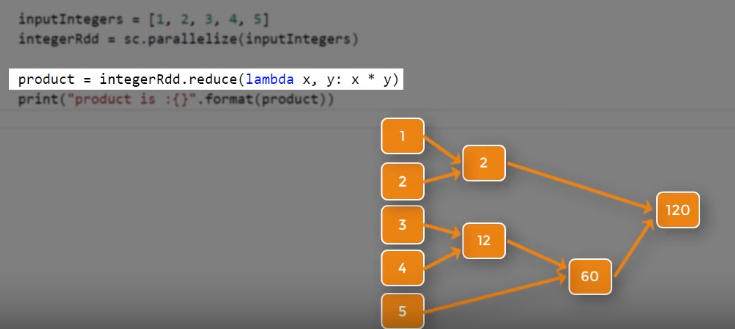

#Important aspects of RDD

##RDDs are Distributed.

* Each RDD is broken into multiple pieces called partitions and these partitions are divided across the clusters. - eg. your cluster has 8 nodes, and your RDD could be spread across 8 partitions (max), also the RDD can be operated on in each node, in parallel and independently. 

  * The partition process is done automatically by spark.
 

##RDD's are inmutable

RDD's cannot be changed after they are created.

* This is because with inmmutability many updating problems are solved.


##RDD's are REsilient

RDD's are a deterministic function of their input. This plus immutability also means the RDD's parts can be recreated at any time. - If any nodes ever goes down, Spark can recover the parts of the RDDs from the input and pick up from where it left off.


#Summary of RDD Operations

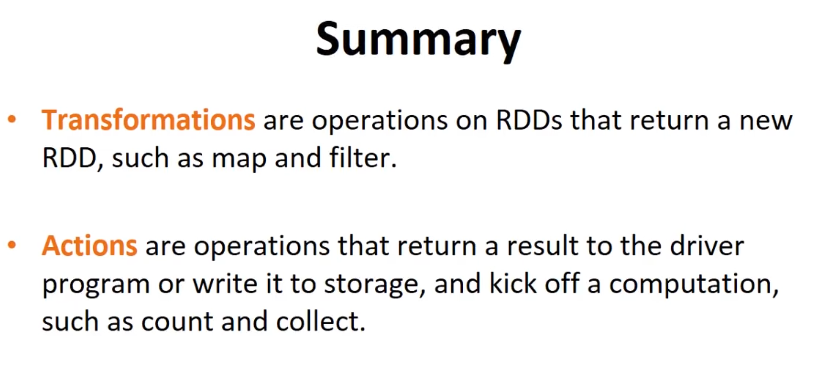

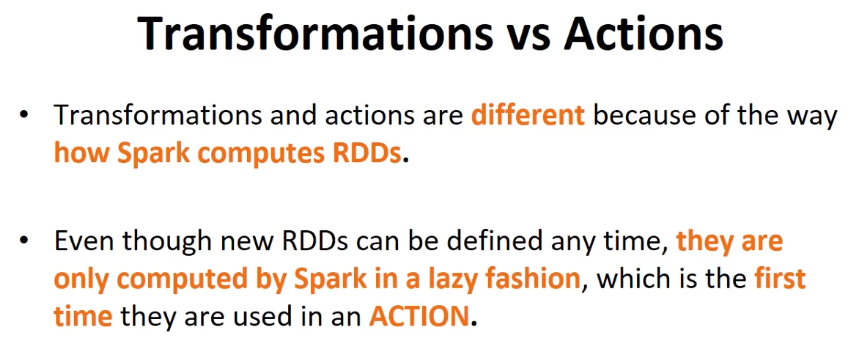

An example of the usefulness of spark.

After loading the text file and filtering the lines that start with friday -> Basically spark only starts calculating the result when we call first(), that way it saves memory. - Spark scans the file only until the first line starting with "Friday" is detected, it does not even need to go through the entire file

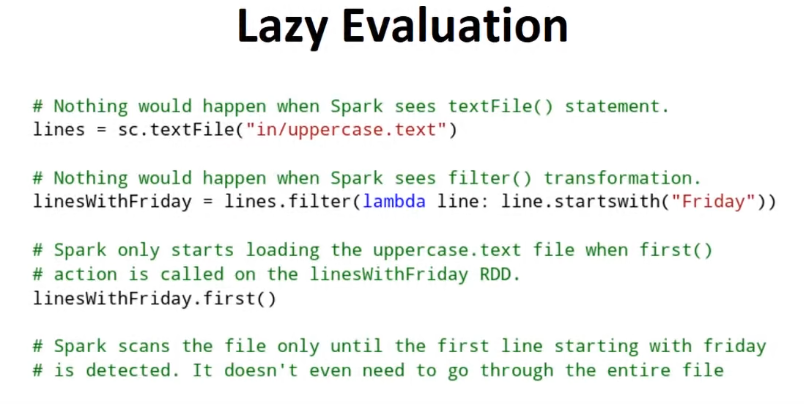

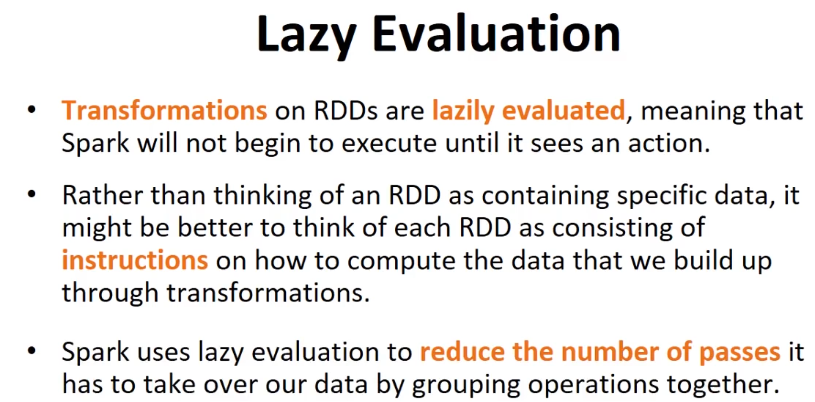

NOTE: Transformations allways return RDD's while Actions return some other data type.

#Caching and persistence
This is another critical spark capacity. This saves a dataset in memory or disk across operations for performance optimization

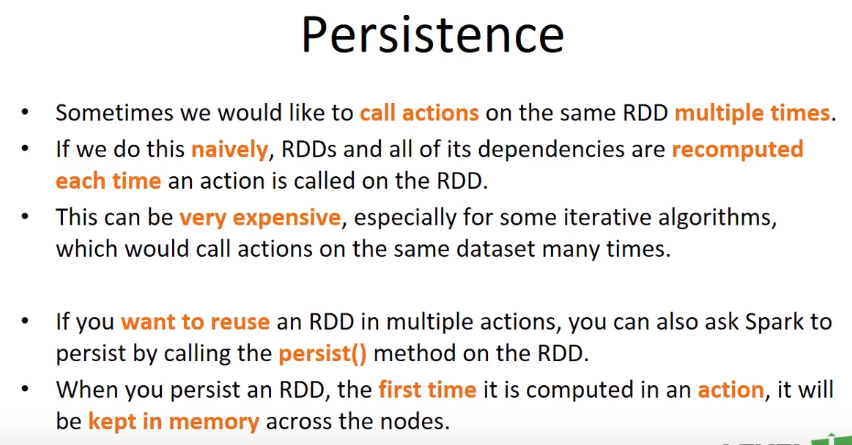

In [0]:
from pyspark import SparkContext, SparkConf, StorageLevel

if __name__ == "__main__":
    conf = SparkConf().setAppName("persist").setMaster("local[*]")
    sc = SparkContext(conf = conf)

    inputIntegers = [1, 2, 3, 4, 5]
    integerRdd = sc.parallelize(inputIntegers)
    
    #Here we persist the RDD
    integerRdd.persist(StorageLevel.MEMORY_ONLY)
    #Here we call reduce and spark parallelizes the transformation
      #to distribute the rdd from the driver program to the worker threads.
      #Since the RDD is persistent it will be capped in memory through the worker threads
    integerRdd.reduce(lambda x, y: x*y)
    
    #now that we call count on the RDD again, spark wont parallelize the transformation again
      #It will just go ahead and do the count action.
    integerRdd.count()


Types of memory we can pass to the persist RDD

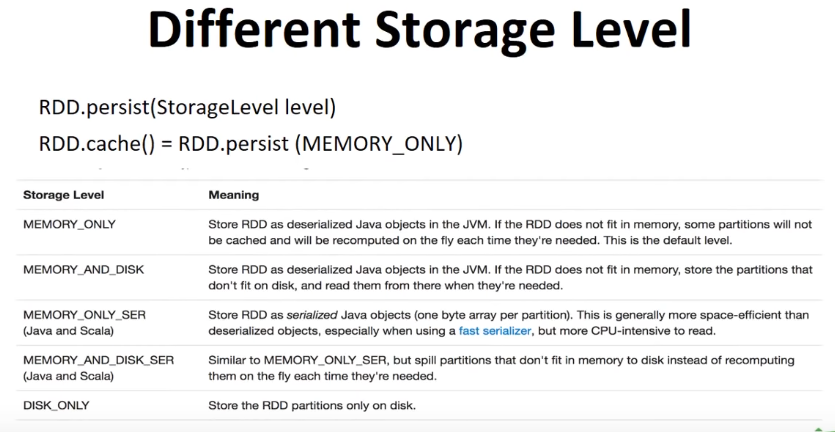

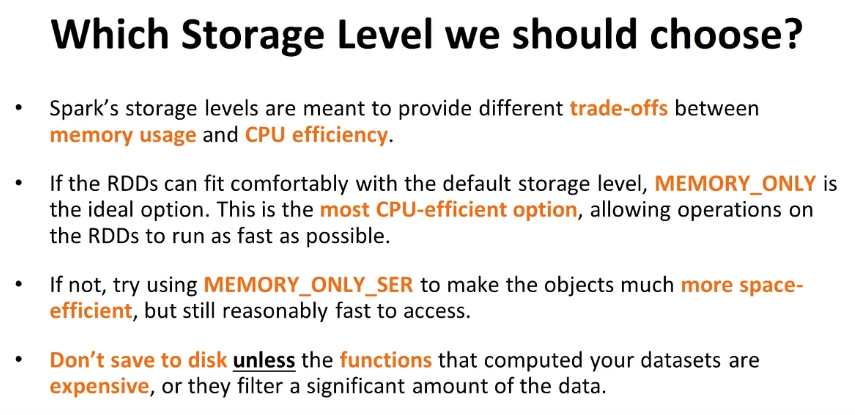

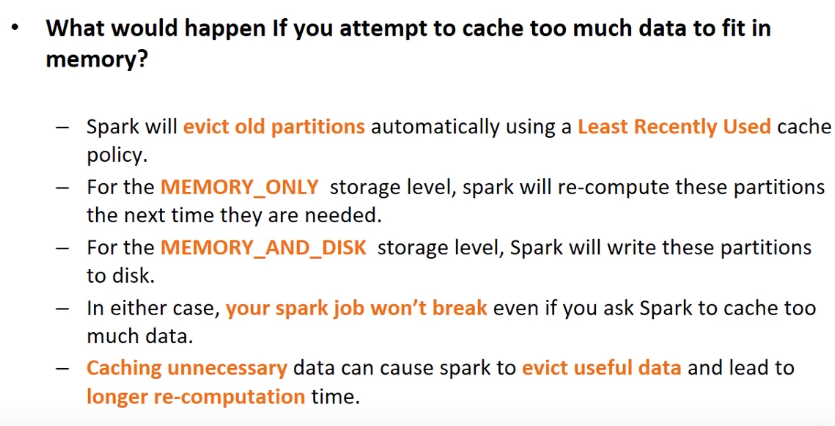